In [52]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [53]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.84178118 0.21478591 0.14811687 0.09917012 0.07991744]


0.9347956730769231
0.9434094551282052
0.9408052884615384
0.9452123397435898
0.9328926282051282
0.9432091346153846
0.9375
0.9468149038461539
0.9393028846153846
0.9376001602564102


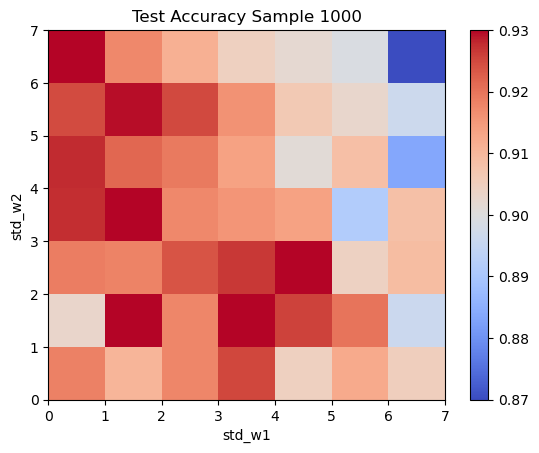

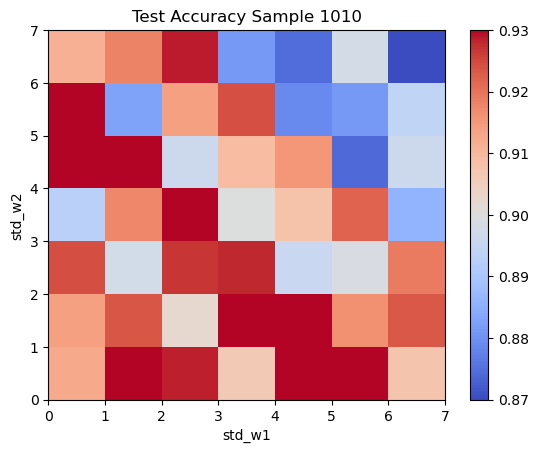

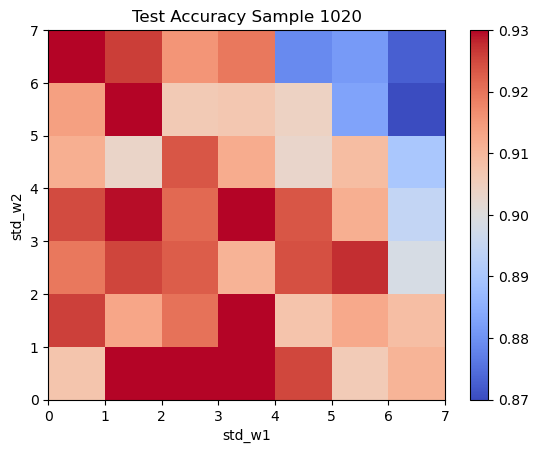

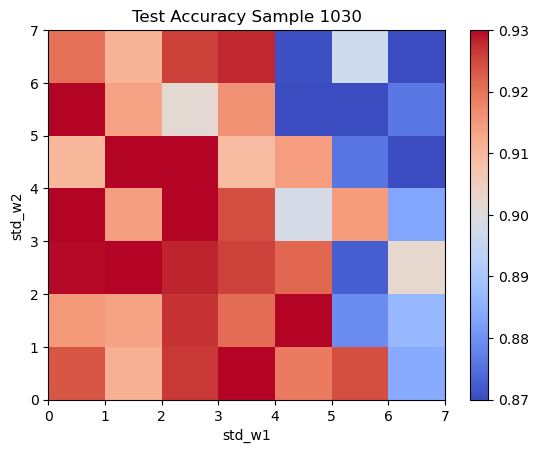

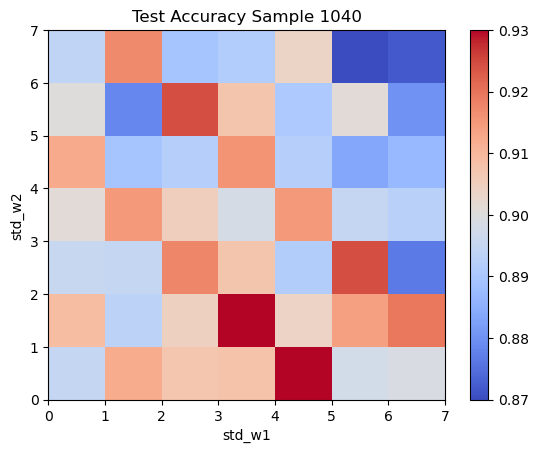

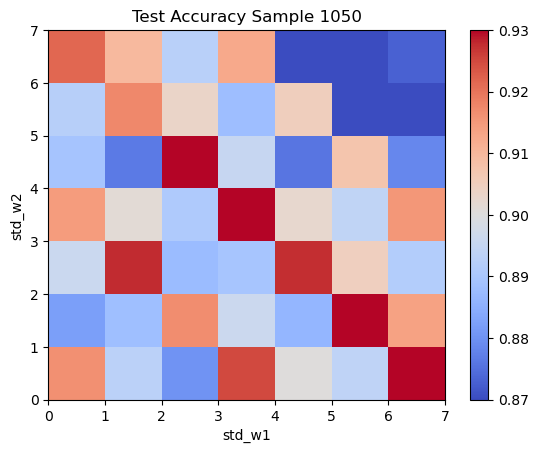

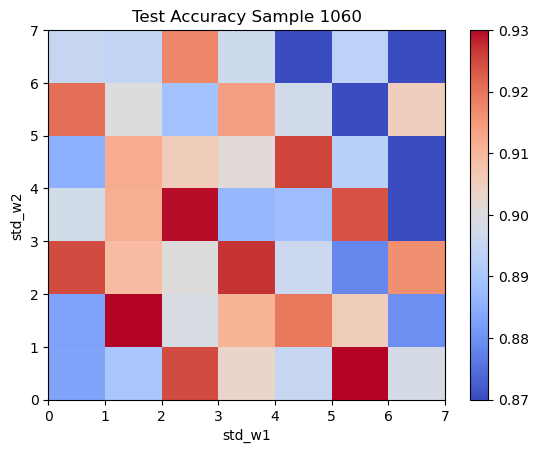

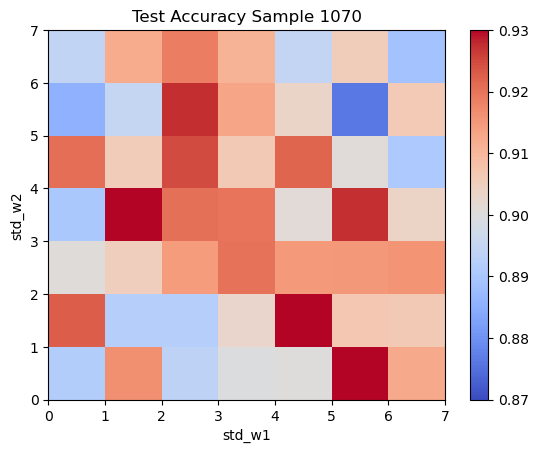

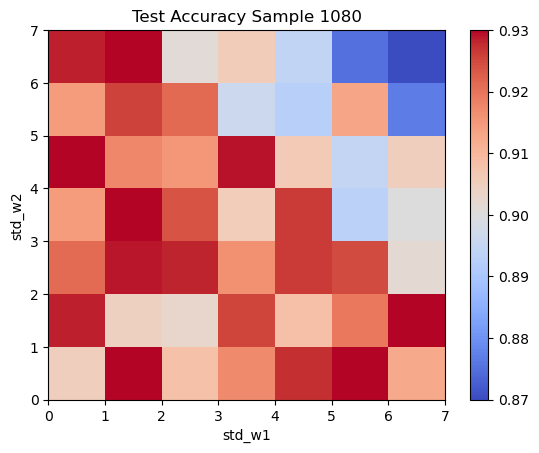

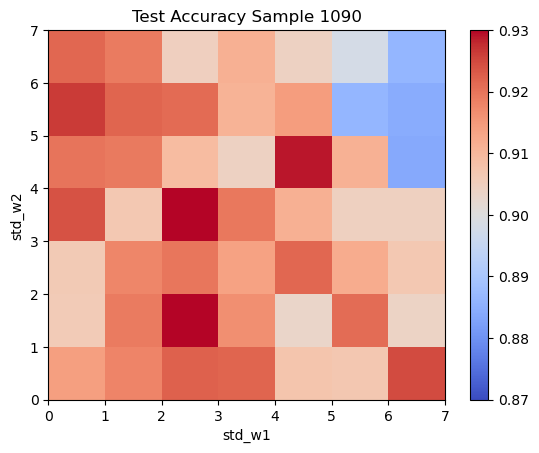

In [54]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(test_accuracy_10_samples[i])
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)


In [55]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [56]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [57]:
train_accuracy_10_samples.shape

(10, 7, 7)

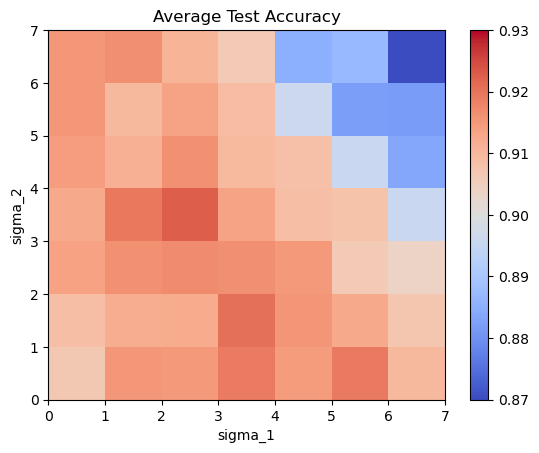

In [58]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_400_0.1.png".format(sample))

In [59]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [60]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [61]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90670072, 0.90889423, 0.91367188, 0.91245994, 0.91433293,
        0.9153145 , 0.91536458],
       [0.91524439, 0.91187901, 0.91632612, 0.91947115, 0.91136819,
        0.90978566, 0.91645633],
       [0.91496394, 0.91197917, 0.91698718, 0.92251603, 0.91619591,
        0.91337139, 0.91058694],
       [0.91901042, 0.92051282, 0.91656651, 0.91343149, 0.90960537,
        0.90934495, 0.90619992],
       [0.9145633 , 0.915625  , 0.91496394, 0.90871394, 0.90843349,
        0.89622396, 0.88478566],
       [0.91940104, 0.91257011, 0.90627003, 0.90780248, 0.89571314,
        0.88215144, 0.8869992 ],
       [0.90973558, 0.90707131, 0.90378606, 0.89575321, 0.88339343,
        0.88153045, 0.86791867]])

In [62]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples.T)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [63]:
test_best_w1_w2

(2, 3)

In [64]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [65]:
test_best_w1_best_w2

array([0.0425, 0.0575])

In [66]:
array = np.array([[0.0575, 0.0275],
[0.0875, 0.0125],
[0.0425, 0.0125],
[0.0575, 0.0125],
[0.0725, 0.0125],
[0.1025, 0.0125],
[0.0275, 0.0275],
[0.0875, 0.0125],
[0.0275, 0.1025],
[0.0425, 0.0275]])

accuracy = np.array([0.9347956730769231
,0.9434094551282052
,0.9408052884615384
,0.9452123397435898
,0.9328926282051282
,0.9432091346153846
,0.9375
,0.9468149038461539
,0.9393028846153846
,0.9376001602564102])

In [67]:
i=0
for (element, acc) in zip(array, accuracy):
    data = {}
    data['frequency'] = 65
    data['N'] = 400
    data['accuracy'] = acc
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_400_seed_{}.npz".format(i),**data)
    i+=1

In [68]:
data = {}
data['frequency'] = 65
data['N'] = 400
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_400.npz",**data)